In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.exceptions import NotFittedError

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv('/content/sample_submission (1).csv')
df = pd.read_csv('/content/test.csv')
df = pd.read_csv('/content/train.csv')

In [3]:
col_drop_list=[]

In [4]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
target='TARGET(PRICE_IN_LACS)'
target

'TARGET(PRICE_IN_LACS)'

In [6]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


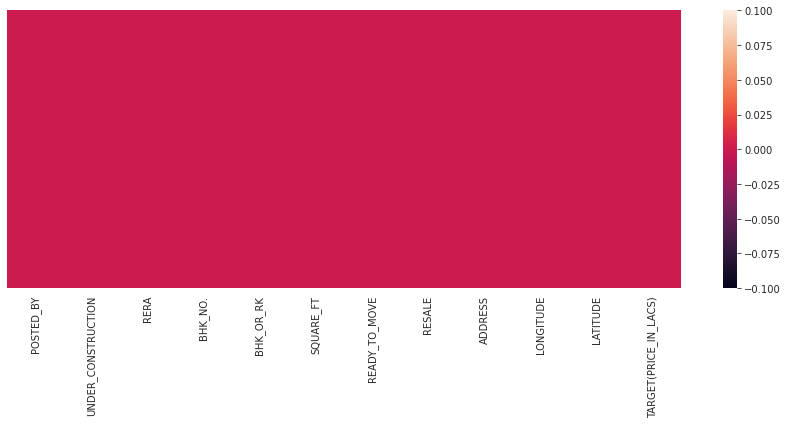

In [10]:
#NULL HEAT MAP
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [11]:
col_drop_list.append('ADDRESS')

In [12]:
df.drop(col_drop_list,axis=1,inplace=True)

In [13]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5


In [14]:
cat_col=[]
for col in df.select_dtypes(include='object'):
    if(col!=target):
        print(f"{col:20} ----> {df[col].nunique():10} unique values")
        cat_col.append(col)
cat_col

POSTED_BY            ---->          3 unique values
BHK_OR_RK            ---->          2 unique values


['POSTED_BY', 'BHK_OR_RK']

In [15]:
num_cat_col=[]
for col in df.select_dtypes(include='int64'):
    if(col!=target):
        print(f"{col:20} ----> {df[col].nunique():10} unique values")
        num_cat_col.append(col)
num_cat_col

UNDER_CONSTRUCTION   ---->          2 unique values
RERA                 ---->          2 unique values
BHK_NO.              ---->         16 unique values
READY_TO_MOVE        ---->          2 unique values
RESALE               ---->          2 unique values


['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'READY_TO_MOVE', 'RESALE']

In [16]:
num_col=[]
for col in df.select_dtypes(include='float64'):
    if(col!=target):
        print(f"{col:30} ----> {df[col].nunique():10} unique values")
        num_col.append(col)
num_col

SQUARE_FT                      ---->      19561 unique values
LONGITUDE                      ---->       4087 unique values
LATITUDE                       ---->       4078 unique values


['SQUARE_FT', 'LONGITUDE', 'LATITUDE']

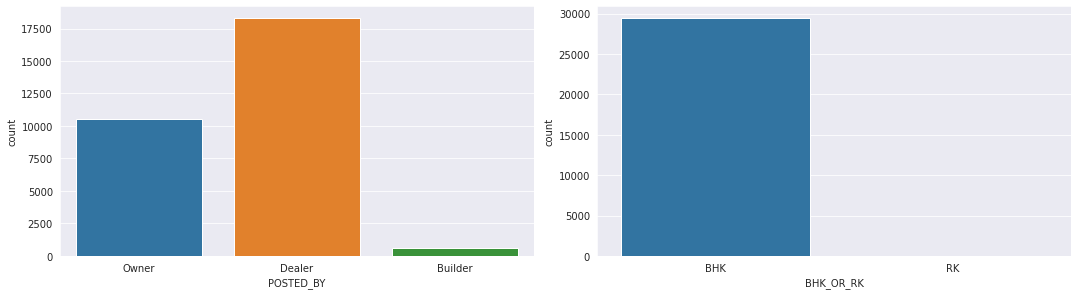

In [17]:
plt.figure(figsize=(30,20))
j=1
for columns in df.select_dtypes(include='object'):
    plt.subplot(5,4,j)
    sns.countplot(x=columns,data=df)
    j+=1
plt.tight_layout()

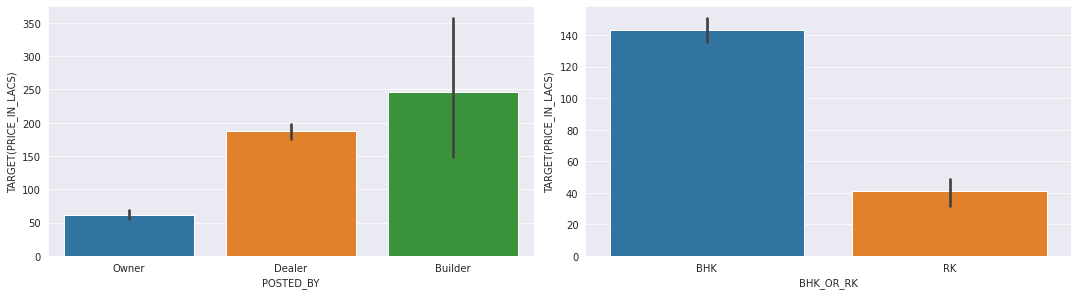

In [18]:
plt.figure(figsize=(30,20))
j=1
for columns in df.select_dtypes(include='object'):
    plt.subplot(5,4,j)
    sns.barplot(y=target,x=columns,data=df)
    j+=1
plt.tight_layout()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.5+ MB


In [20]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')

ms,ss=MinMaxScaler(),StandardScaler()


ct=ColumnTransformer([
    ('cat_encoder',oh,make_column_selector(dtype_include='object')),
    ('num_encoder',ms,make_column_selector(dtype_include='float64'))
],remainder='passthrough',n_jobs=-1)

In [21]:
df.head(1)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.96991,77.59796,55.0


In [22]:
X=df.drop([target],axis=1)
y=df[[target]]
X.head(1)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,Owner,0,0,2,BHK,1300.236407,1,1,12.96991,77.59796


In [23]:
y.head(1)

,TARGET(PRICE_IN_LACS)
0,55.0


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=108)

In [25]:
X_train.shape,y_train.shape

((23560, 10), (23560, 1))

In [26]:
X_test.shape,y_test.shape

((5891, 10), (5891, 1))

In [27]:
X_test.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
17538,Owner,0,0,2,BHK,1189.885969,1,1,26.351855,86.326143
26474,Dealer,0,0,3,BHK,1449.975834,1,1,26.832353,75.841749


In [28]:
y_test.head(2)

,TARGET(PRICE_IN_LACS)
17538,24.0
26474,30.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.5+ MB


In [30]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [31]:
print("-"*50)
for i in ct.transformers_:
    print(i)
    if(i[0]!='remainder'):
        print(i[1].get_feature_names_out())   
    print("-"*50)

--------------------------------------------------
('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), ['POSTED_BY', 'BHK_OR_RK'])
['POSTED_BY_Dealer' 'POSTED_BY_Owner' 'BHK_OR_RK_RK']
--------------------------------------------------
('num_encoder', MinMaxScaler(), ['SQUARE_FT', 'LONGITUDE', 'LATITUDE'])
['SQUARE_FT' 'LONGITUDE' 'LATITUDE']
--------------------------------------------------
('remainder', 'passthrough', [1, 2, 3, 6, 7])
--------------------------------------------------


In [32]:
X_train.shape,y_train.shape

((23560, 11), (23560, 1))

In [33]:
tup1=None;tup2=None
try:
    tup1=(X_test[0].toarray(),y_test.head(1).values)  # scientific notation
    print("Sparse Matrix to Dense Array")
except:
    tup2=(X_test[0],y_test.head(1).values) 
    print("Normal Matrix to Dense Array")

tup1 if(tup1) else tup2

Normal Matrix to Dense Array


(array([0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.66276636e-06,
        6.56228194e-01, 7.53165458e-01, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00]), array([[24.]]))

In [34]:
X_test.shape,y_test.shape

((5891, 11), (5891, 1))

In [35]:
def print_model_locations(model_list):
    print("-"*80)
    for i,model in enumerate(model_list):
        print(model)
        print(f"{model.__class__.__name__:50} at index {i}")
        print("-"*80)

In [36]:
def model_fitter(model_list):
    print("-"*80)
    for reg in model_list:
        reg_name=reg.__class__.__name__
        reg.fit(X_train,y_train.values.ravel())
        print(f"Fitting {reg_name} done")
        print("-"*80)

In [37]:
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor


In [38]:
reg_list=[
    DecisionTreeRegressor(),
    LinearRegression(n_jobs=-1),
    RandomForestRegressor(n_estimators=200,n_jobs=-1),
    AdaBoostRegressor(n_estimators=200,learning_rate=0.1),
    XGBRegressor(n_estimators=200,learning_rate=0.1,n_jobs=-1),
    LGBMRegressor(n_estimators=200,learning_rate=0.1,n_jobs=-1),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.1),
]

In [39]:
reg_list_copy=[
    DecisionTreeRegressor(),
    LinearRegression(n_jobs=1),
    RandomForestRegressor(n_estimators=200,n_jobs=-1),
    AdaBoostRegressor(n_estimators=200,learning_rate=0.1),
    XGBRegressor(n_estimators=200,learning_rate=0.1,tree_method='gpu_hist',n_jobs=-1),
    LGBMRegressor(n_estimators=200,learning_rate=0.1,device='gpu',n_jobs=-1),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.1),
]

In [40]:
print_model_locations(reg_list)

--------------------------------------------------------------------------------
DecisionTreeRegressor()
DecisionTreeRegressor                              at index 0
--------------------------------------------------------------------------------
LinearRegression(n_jobs=-1)
LinearRegression                                   at index 1
--------------------------------------------------------------------------------
RandomForestRegressor(n_estimators=200, n_jobs=-1)
RandomForestRegressor                              at index 2
--------------------------------------------------------------------------------
AdaBoostRegressor(learning_rate=0.1, n_estimators=200)
AdaBoostRegressor                                  at index 3
--------------------------------------------------------------------------------
XGBRegressor(n_estimators=200, n_jobs=-1)
XGBRegressor                                       at index 4
--------------------------------------------------------------------------------
LGBM

In [41]:
%%time
model_fitter(reg_list)

--------------------------------------------------------------------------------
Fitting DecisionTreeRegressor done
--------------------------------------------------------------------------------
Fitting LinearRegression done
--------------------------------------------------------------------------------
Fitting RandomForestRegressor done
--------------------------------------------------------------------------------
Fitting AdaBoostRegressor done
--------------------------------------------------------------------------------
[17:11:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting XGBRegressor done
--------------------------------------------------------------------------------
Fitting LGBMRegressor done
--------------------------------------------------------------------------------
Fitting GradientBoostingRegressor done
--------------------------------------------------------------------------------
CP

In [42]:
def tester_func(model_list):
    for i,reg in enumerate(model_list):
        
        reg_name = reg.__class__.__name__
        pred=None
        
        try:
            pred=reg.predict(X_test)
        except NotFittedError as e:
            raise(e)
            
        print("-"*80)
        print(f"Predicitng {reg_name:40} done")
        score_dict[reg_name]={
            "R2 Score":r2_score(y_test,pred),
            "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False),
            "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
            "Mean Squared Error Score":mean_squared_error(y_test,pred),
            'model_index':int(i)
        }
        j=i
    
    print("-"*80)
    
    return j


In [43]:
score_dict={};j=0

In [44]:
j_copy=tester_func(reg_list)

--------------------------------------------------------------------------------
Predicitng DecisionTreeRegressor                    done
--------------------------------------------------------------------------------
Predicitng LinearRegression                         done
--------------------------------------------------------------------------------
Predicitng RandomForestRegressor                    done
--------------------------------------------------------------------------------
Predicitng AdaBoostRegressor                        done
--------------------------------------------------------------------------------
Predicitng XGBRegressor                             done
--------------------------------------------------------------------------------
Predicitng LGBMRegressor                            done
--------------------------------------------------------------------------------
Predicitng GradientBoostingRegressor                done
----------------------------------

In [45]:
j_copy

6

In [46]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('Root Mean Squared Error')
score_pd

,R2 Score,Root Mean Squared Error,Mean Absolute Error Score,Mean Squared Error Score,model_index
XGBRegressor,0.791407,327.538932,41.615720,107281.752247,4.0
GradientBoostingRegressor,0.776660,338.919448,45.082722,114866.392472,6.0
DecisionTreeRegressor,0.764385,348.108229,36.223789,121179.339154,0.0
AdaBoostRegressor,0.753113,356.337861,101.149624,126976.670999,3.0
RandomForestRegressor,0.736965,367.806688,33.304335,135281.759802,2.0
LGBMRegressor,0.650705,423.847310,42.942769,179646.542486,5.0
LinearRegression,0.425326,543.655410,130.786050,295561.205171,1.0


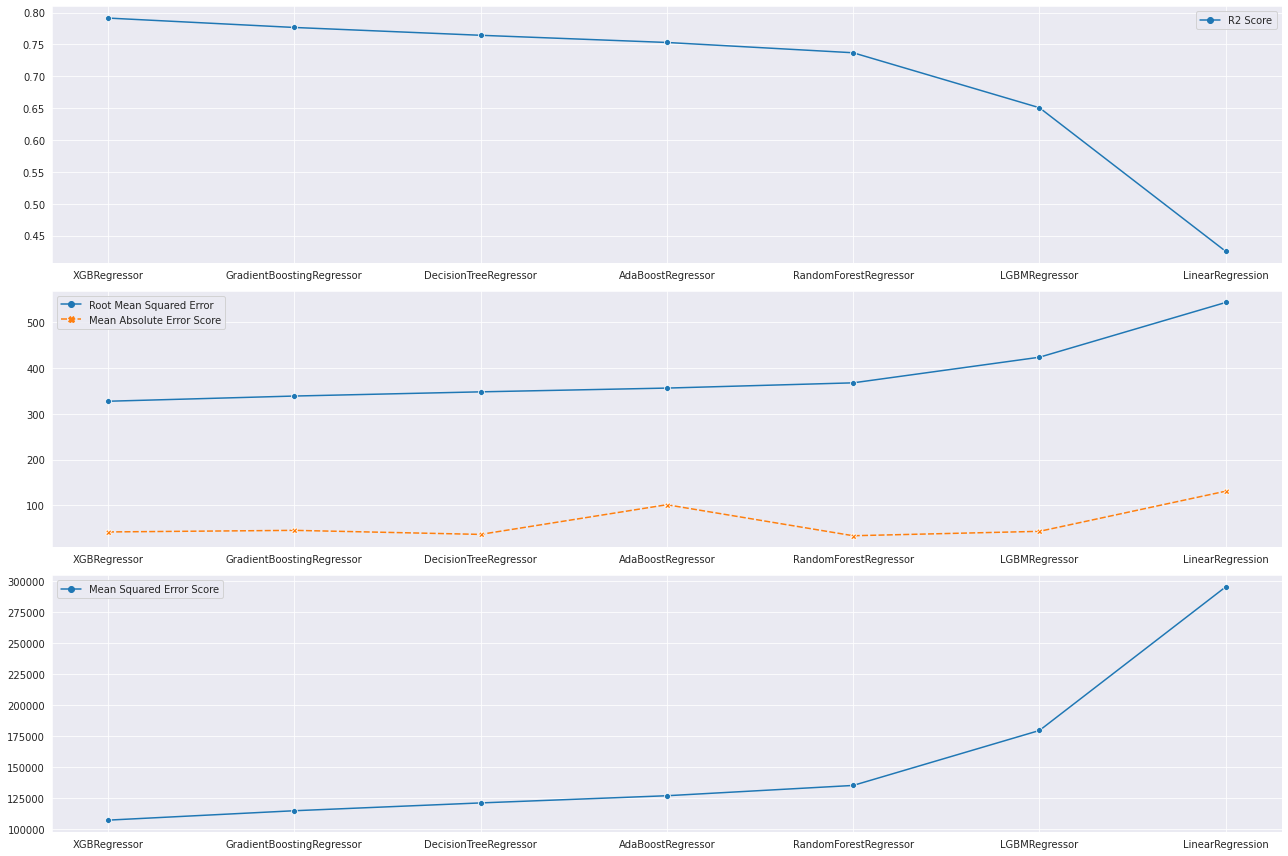

In [47]:
fig,ax=plt.subplots(3,1,figsize=(18,12))
sns.lineplot(data=score_pd.iloc[:,[1,2]],markers=True,ax=ax[1])
sns.lineplot(data=score_pd.iloc[:,[0]],markers=True,ax=ax[0])
sns.lineplot(data=score_pd.iloc[:,[3]],markers=True,ax=ax[2])
plt.tight_layout()
plt.show()

In [48]:
score_pd.iloc[[0],:]

,R2 Score,Root Mean Squared Error,Mean Absolute Error Score,Mean Squared Error Score,model_index
XGBRegressor,0.791407,327.538932,41.61572,107281.752247,4.0


In [49]:
win_index=int(score_pd.iloc[0,-1])
win_index

4

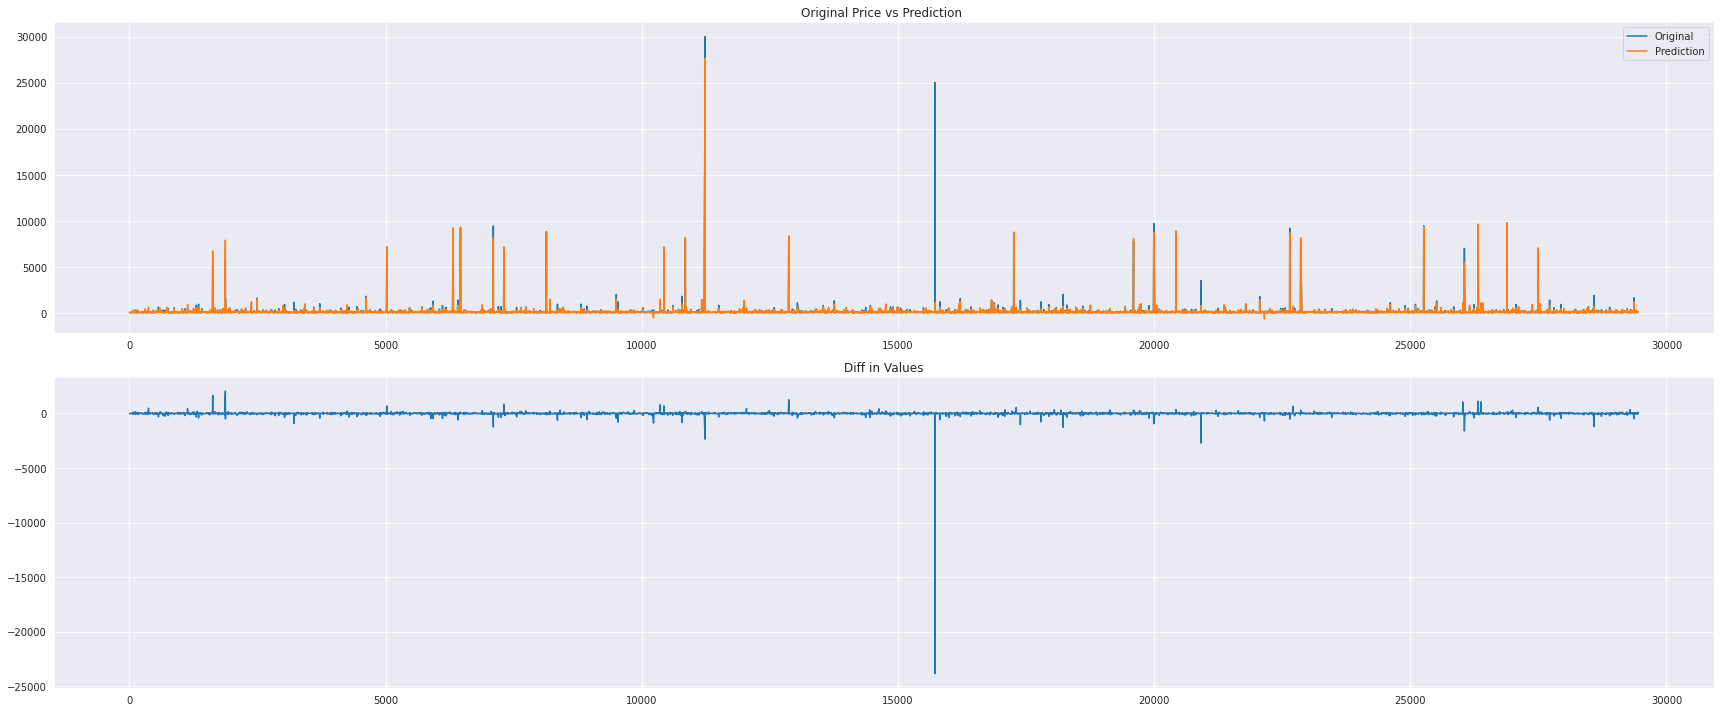

In [50]:
pred=reg_list[win_index].predict(X_test)
diff=pred-y_test.values.ravel()

fig,ax=plt.subplots(2,1,figsize=(24,10))
sns.lineplot(y=y_test.values.ravel(),x=y_test.index,legend=False,ax=ax[0])
sns.lineplot(y=pred,x=y_test.index,legend=False,ax=ax[0])
sns.lineplot(y=diff,x=y_test.index,legend="full",ax=ax[1])
ax[0].set_title('Original Price vs Prediction ')
ax[0].legend(['Original','Prediction'])
ax[1].set_title('Diff in Values')
plt.tight_layout()
plt.show()